In [ ]:
!pip install ucimlrepo

In [8]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
air_quality = fetch_ucirepo(id=360)

# data (as pandas dataframes)
X = air_quality.data.features
y = air_quality.data.targets

# metadata
print(air_quality.metadata)

# variable information
print(air_quality.variables)

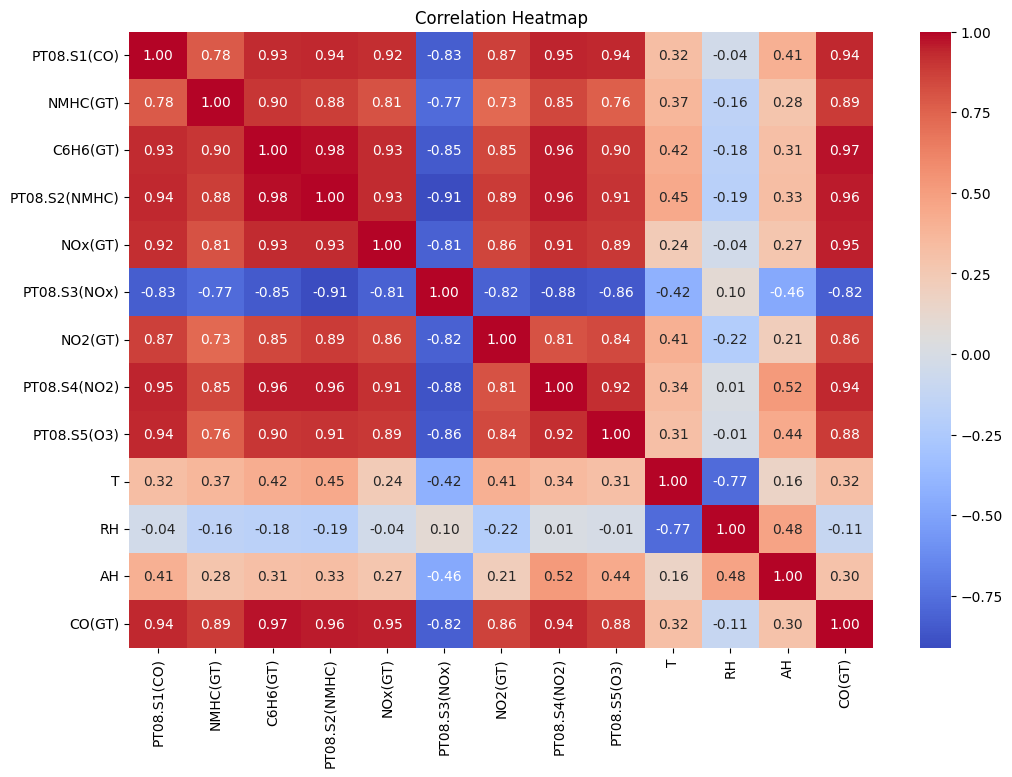

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix plot for features and target variable
plt.figure(figsize=(12, 8))
correlation_matrix = combined.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [9]:
# Fetch dataset
air_quality = fetch_ucirepo(id=360)

# Data (as pandas dataframes)
X = air_quality.data.features

# Manually set the target variable, for example, CO(GT)
y = X['CO(GT)']

In [10]:
# Drop non-predictive columns and the target from X
X = X.drop(columns=['CO(GT)', 'Date', 'Time'])

# Handle missing values by replacing -200 with NaN in both X and y
X.replace(-200, np.nan, inplace=True)
y.replace(-200, np.nan, inplace=True)

In [11]:
# Drop rows with missing values in either X or y to ensure both have the same rows
combined = pd.concat([X, y], axis=1)
combined = combined.dropna()

# Separate X and y again after dropping NaNs
X = combined.drop(columns=['CO(GT)'])
y = combined['CO(GT)']

In [12]:
# Now, X and y should have the same number of rows and no NaN values
print(f"Shapes after dropping missing values: X={X.shape}, y={y.shape}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with polynomial features, standard scaler, and a regression model
def build_model(model):
    pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=2, include_bias=False)),
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])
    return pipeline

Shapes after dropping missing values: X=(827, 12), y=(827,)


In [13]:
# Initialize different regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet Regression": ElasticNet(alpha=0.1, l1_ratio=0.5)
}

In [14]:
# Train and evaluate each model
for name, model in models.items():
    pipeline = build_model(model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    cross_val = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2').mean()

    print(f"{name}:")
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")
    print(f"Cross-Validation R^2 Score: {cross_val}")
    print("-" * 40)

Linear Regression:
Mean Squared Error: 0.04045207926660211
R^2 Score: 0.9805672673341169
Cross-Validation R^2 Score: 0.9776264050741901
----------------------------------------
Ridge Regression:
Mean Squared Error: 0.039501215030017967
R^2 Score: 0.9810240520246963
Cross-Validation R^2 Score: 0.9804656108467903
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.862e-01, tolerance: 1.294e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.273e-01, tolerance: 1.021e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.157e-01, tolerance: 1.083e

Lasso Regression:
Mean Squared Error: 0.05675088758953265
R^2 Score: 0.9727374996026599
Cross-Validation R^2 Score: 0.9687754827052629
----------------------------------------
ElasticNet Regression:
Mean Squared Error: 0.04995208821753187
R^2 Score: 0.9760035678256139
Cross-Validation R^2 Score: 0.973945041166232
----------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.529e-01, tolerance: 1.081e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.570e-01, tolerance: 1.021e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.462e-01, tolerance: 9.696e

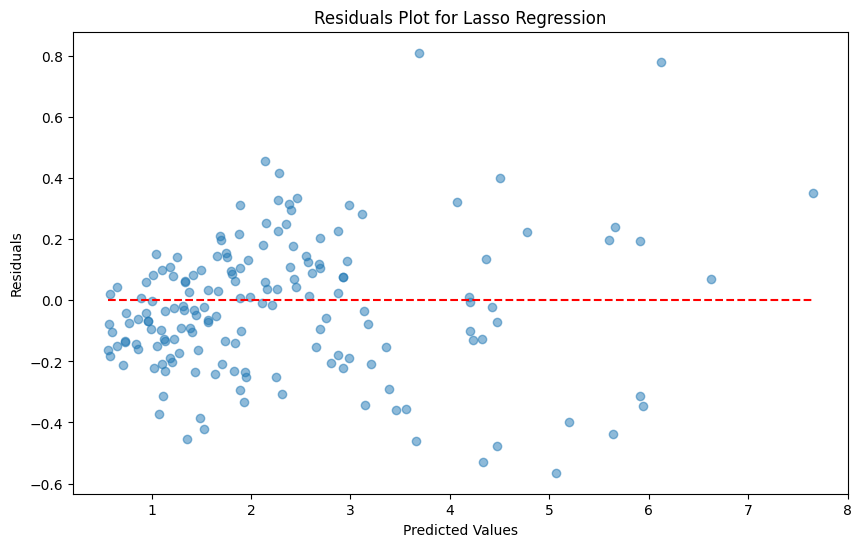

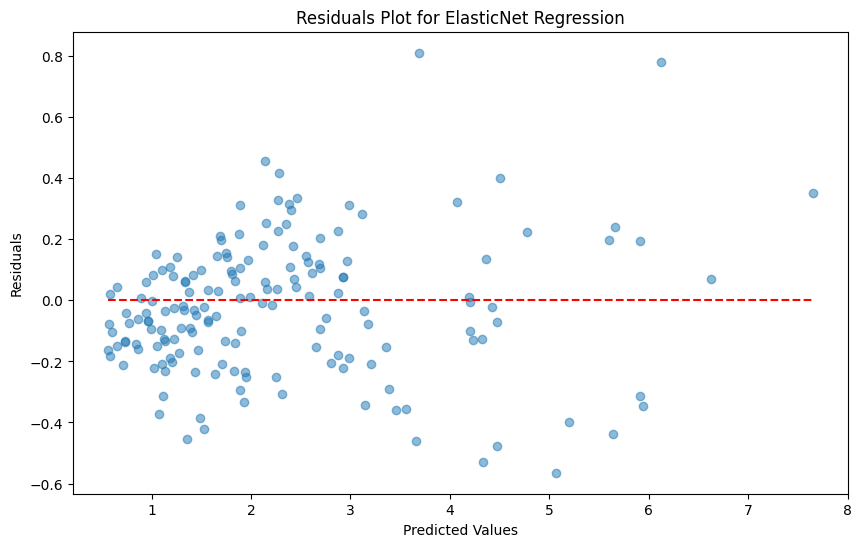

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='red', linestyles='dashed')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title(f"Residuals Plot for {model_name}")
    plt.show()

# Residuals plot for Lasso Regression
plot_residuals(y_test, pipeline.predict(X_test), "Lasso Regression")

# Residuals plot for ElasticNet Regression
plot_residuals(y_test, pipeline.predict(X_test), "ElasticNet Regression")


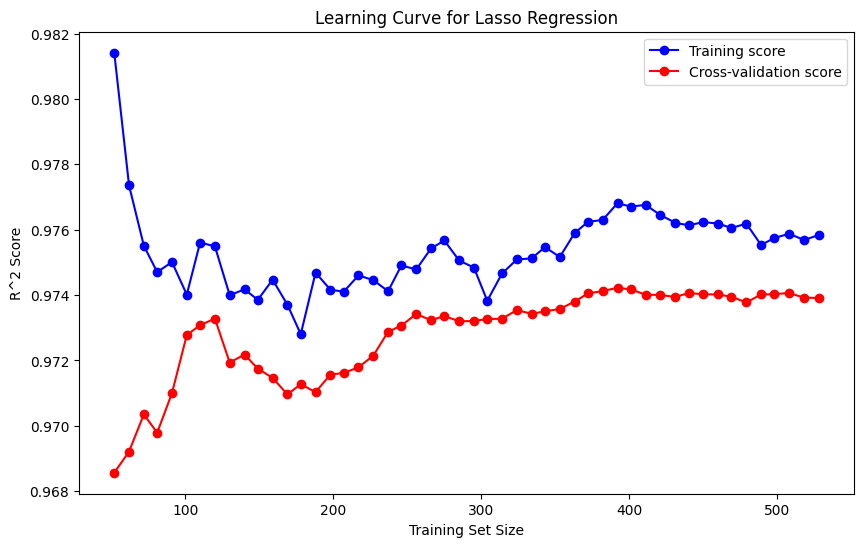

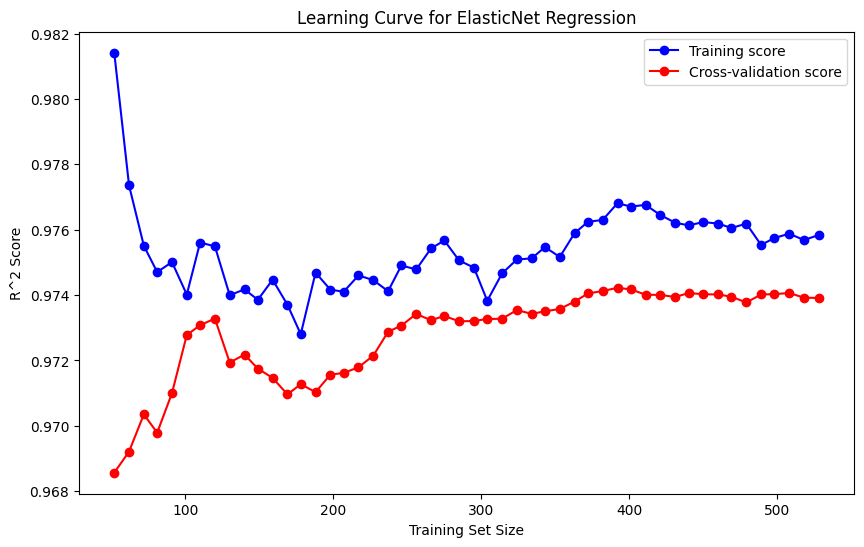

In [19]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, X, y, model_name):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 50))

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='red', label='Cross-validation score')

    plt.title(f"Learning Curve for {model_name}")
    plt.xlabel("Training Set Size")
    plt.ylabel("R^2 Score")
    plt.legend(loc="best")
    plt.show()

# Learning curve for Lasso Regression
plot_learning_curve(pipeline, X_train, y_train, "Lasso Regression")

# Learning curve for ElasticNet Regression
plot_learning_curve(pipeline, X_train, y_train, "ElasticNet Regression")


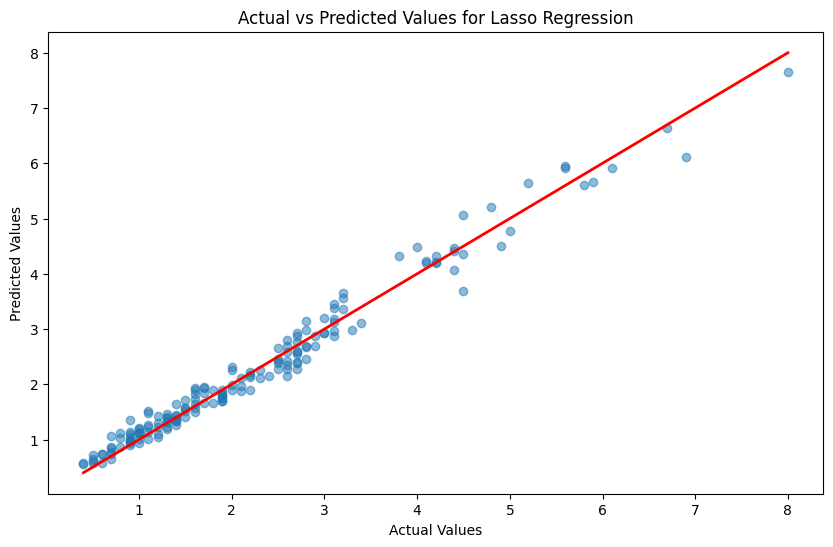

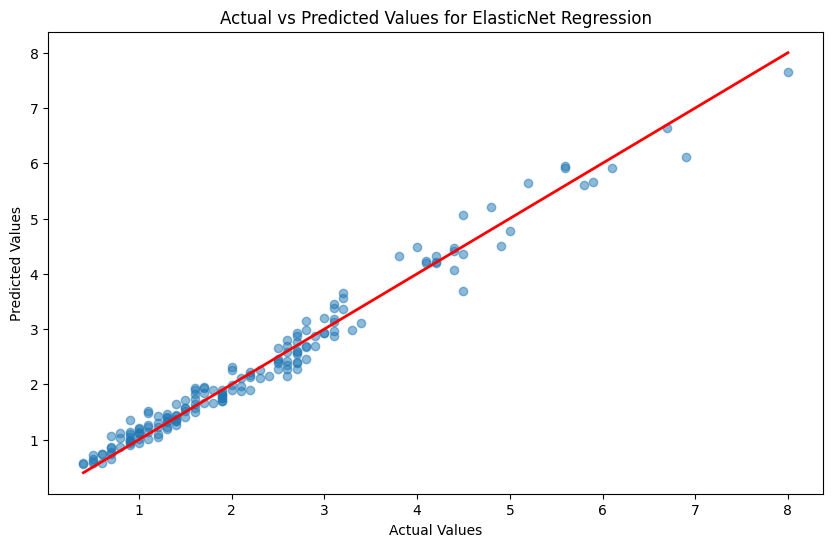

In [18]:
def plot_predictions(y_true, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', lw=2)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Actual vs Predicted Values for {model_name}")
    plt.show()

# Plot for Lasso Regression
plot_predictions(y_test, pipeline.predict(X_test), "Lasso Regression")

# Plot for ElasticNet Regression
plot_predictions(y_test, pipeline.predict(X_test), "ElasticNet Regression")
